**[LeetCode Link](https://leetcode-cn.com/problems/lowest-common-ancestor-of-a-binary-tree/solution/236-er-cha-shu-de-zui-jin-gong-gong-zu-xian-hou-xu/)**

## 后续遍历DFS
若 root 是 p,q 的**最近公共祖先** ，则只可能为以下情况之一：
* p 和 q 在 root 的子树中，且分列 root 的**异侧**（即分别在左、右子树中）；
* p=root ，且 q 在 root 的左或右子树中；
* q=root ，且 p 在 root 的左或右子树中；
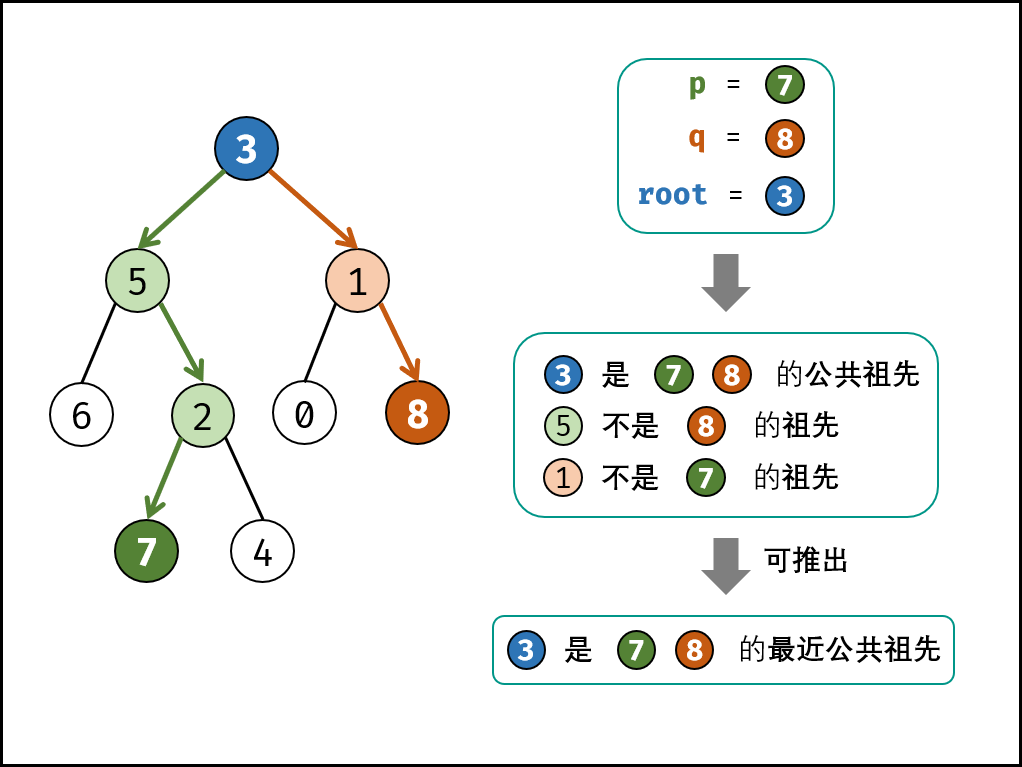

### 递归解析：
* **终止条件：**
    * 当越过叶节点，则直接返回 null ；
    * 当 root 等于 p,q ，则直接返回 root ；
* **递推工作：**
    * 开启递归左子节点，返回值记为 left ；
    * 开启递归右子节点，返回值记为 right ；
* **返回值： 根据 left 和 right ，可展开为四种情况；**
    * 当 left 和 right 同时为空 ：说明 root 的左 / 右子树中都不包含 p,q ，返回 null ；
    * 当 left 和 right 同时不为空 ：说明 p,q 分列在 root 的 异侧 （分别在 左 / 右子树），因此 root 为最近公共祖先，返回 root ；
    * 当 left 为空 ，right 不为空 ：p,q 都不在 root 的左子树中，直接返回 right 。具体可分为两种情况：
        * p,q 其中一个在 root 的 右子树 中，此时 right 指向 p（假设为 p ）；
        * p,q 两节点都在 root 的 右子树 中，此时的 right 指向 最近公共祖先节点 ；
    * 当 left 不为空 ， right 为空 ：与情况 3. 同理；

> 观察发现， 情况 1. 可合并至 3. 和 4. 内，详见文章末尾代码。

### 复杂度分析：
* 时间复杂度 $\mathcal{O}(N)$ ： 其中 N 为二叉树节点数；最差情况下，需要递归遍历树的所有节点。
* 空间复杂度 $\mathcal{O}(N)$ ： 最差情况下，递归深度达到 N ，系统使用 $\mathcal{O}(N)$ 大小的额外空间。

In [ ]:
class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        if not root or root == p or root == q: return root
        left = self.lowestCommonAncestor(root.left, p, q)
        right = self.lowestCommonAncestor(root.right, p, q)
        if not left: return right
        if not right: return left
        return root